In [ ]:
%cd /content/drive/My Drive/Image Segmentation/Telugu character Segmentation/  

/content/drive/My Drive/Image Segmentation/Telugu character Segmentation


In [ ]:
ls -l

total 19255
-rw------- 1 root root 11657960 May  8 10:19  Detectron2_Tutorial.ipynb
-rw------- 1 root root    16542 May  7 08:35  Detectron_Sample.ipynb
-rw------- 1 root root     5270 May  7 06:08  label2coco.py
drwx------ 2 root root     4096 May 11 05:11  output/
-rw------- 1 root root      754 May  7 05:50  resize.py
-rw------- 1 root root  7026100 May 11 06:12  Segmentation_Part1.ipynb
-rw------- 1 root root     8678 Jun 19  2019  test_2.jpg
-rw------- 1 root root     4483 May  8 10:48  test_3.jpg
-rw------- 1 root root     6118 May 11 05:39 'test_4 (1).png'
-rw------- 1 root root     6118 May 11 05:36  test_4.png
-rw------- 1 root root    13239 May 11 05:32 'test_5 (1).png'
-rw------- 1 root root    13239 May 11 05:41 'test_5 (2).png'
-rw------- 1 root root    13239 May  8 10:53  test_5.png
-rw------- 1 root root     4711 May 11 05:34 'test_6 (1).png'
-rw------- 1 root root     4711 May  8 10:53  test_6.png
-rw------- 1 root root     8629 May  8 10:52  test_7.png
drwx------ 2 roo

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
     |████████████████████████████████| 276kB 3.5MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=8552e372c6f5d4d81059acd1e0029f31050c5120f9b973a9475a1bb8fd41252f
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-ljinwb60
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-ljinwb60
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-lin

In [ ]:
# install detectron2:
!pip install detectron2==0.1.2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 628kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200603-cp36-none-any.whl size=41026 sha256=fd78aa778b0a542216d0083d85f1af3d592b6e98da35d929f09199339bf5e92c
  Stored in directory: /root/.cache/pip/wheels/0b/6a/17/318f4c72dad2d0d7f63f8866d6c973e34e20bd24031b240b6d
Successfully built fvcore


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

In [ ]:
%%bash
# python 
python -c 'import torch; from torch.utils.cpp_extension import CUDA_HOME; print(torch.cuda.is_available(), CUDA_HOME)'

True /usr/local/cuda


In [ ]:
import detectron2
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

In [ ]:
register_coco_instances("telugu_characters_train", {}, "train.json", "train_data")
register_coco_instances("telugu_characters_test", {}, "test.json", "test_data")

In [ ]:
train_meta = MetadataCatalog.get("telugu_characters_train")
train_meta

Metadata(evaluator_type='coco', image_root='train_data', json_file='train.json', name='telugu_characters_train')

In [ ]:
train_dataset_dicts = DatasetCatalog.get("telugu_characters_train")
len(train_dataset_dicts)

[06/03 07:42:21 d2.data.datasets.coco]: Loading train.json takes 1.03 seconds.
WARNING [06/03 07:42:21 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/03 07:42:21 d2.data.datasets.coco]: Loaded 200 images in COCO format from train.json


200

## Visualize train data

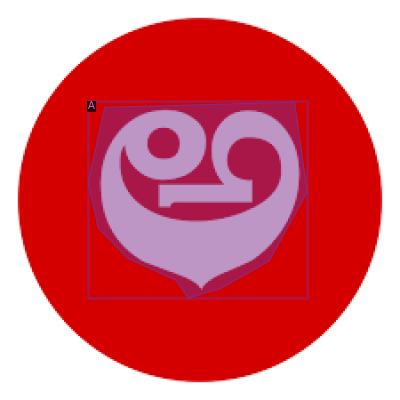

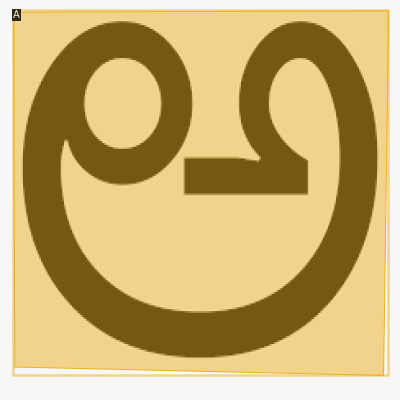

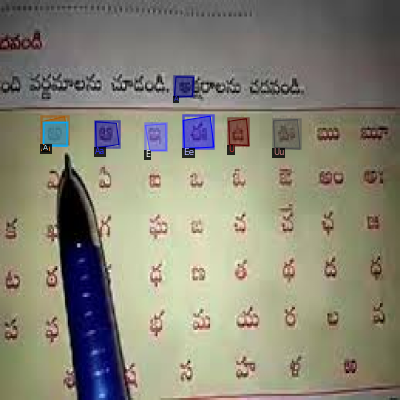

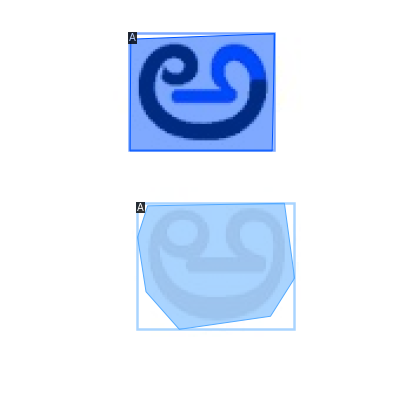

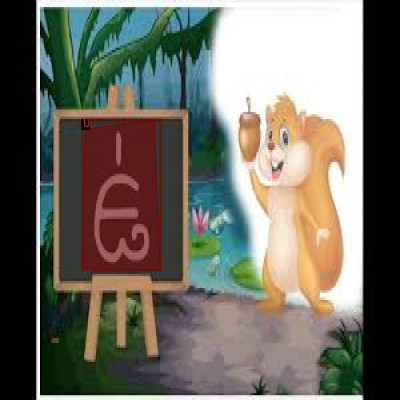

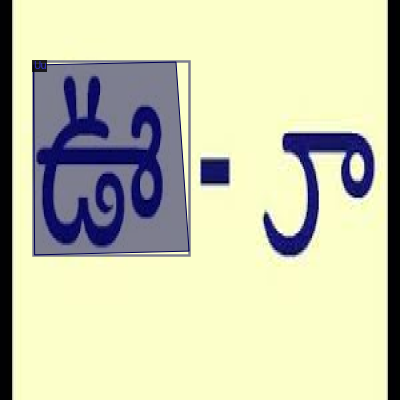

In [ ]:
for d in random.sample(train_dataset_dicts, 6):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_meta, scale=1)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

In [ ]:

cfg.DATASETS.TRAIN = ("telugu_characters_train",)
cfg.DATASETS.TEST = ("telugu_characters_test",)  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = (
    2000
)  
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    128
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # 6 classes (A, Aa, E, Ee, U, Uu)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[06/03 07:43:12 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:07, 22.3MB/s]                           
Unable to load 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (7, 1024) in the model!
Unable to load 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (7,) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (24, 1024) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (24,) in the model!
Unable to load 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (6, 256, 1, 1) in the model!
Unable to load 'roi_heads.mask_head.predictor.bias' to the model due to incompatible shapes: (80,) in the checkpoint but (6,) in the model!


[06/03 07:43:28 d2.engine.train_loop]: Starting training from iteration 0
[06/03 07:43:48 d2.utils.events]:  eta: 0:32:49  iter: 19  total_loss: 3.165  loss_cls: 1.722  loss_box_reg: 0.477  loss_mask: 0.695  loss_rpn_cls: 0.158  loss_rpn_loc: 0.032  time: 0.9854  data_time: 0.0622  lr: 0.000020  max_mem: 1857M
[06/03 07:44:09 d2.utils.events]:  eta: 0:33:01  iter: 39  total_loss: 2.853  loss_cls: 1.270  loss_box_reg: 0.488  loss_mask: 0.687  loss_rpn_cls: 0.214  loss_rpn_loc: 0.036  time: 0.9927  data_time: 0.0070  lr: 0.000040  max_mem: 1857M
[06/03 07:44:30 d2.utils.events]:  eta: 0:32:49  iter: 59  total_loss: 2.376  loss_cls: 0.899  loss_box_reg: 0.702  loss_mask: 0.674  loss_rpn_cls: 0.071  loss_rpn_loc: 0.031  time: 1.0051  data_time: 0.0068  lr: 0.000060  max_mem: 1857M
[06/03 07:44:50 d2.utils.events]:  eta: 0:32:41  iter: 79  total_loss: 2.501  loss_cls: 0.921  loss_box_reg: 0.787  loss_mask: 0.653  loss_rpn_cls: 0.064  loss_rpn_loc: 0.038  time: 1.0062  data_time: 0.0074  lr:

In [ ]:
# Look at training curves in tensorboard:
!kill 895
%load_ext tensorboard
%tensorboard --logdir output

/bin/bash: line 0: kill: (895) - No such process
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1389), started 0:01:37 ago. (Use '!kill 1389' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
!tensorboard dev upload --logdir ./output \
  --name "Telugu Character Recognition Segmentation" \
  --description "Training results"


Upload stopped. View your TensorBoard at https://tensorboard.dev/experiment/hjZr4HW0QFq1z4yBGBpBPg/
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/main.py", line 75, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 299, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 250, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/program.py", line 289, in main
    return runner(self.flags) or 0
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/uploader/uploader_subcommand.py", line 601, in run
    return _run(flags)
  File "/usr/local/lib/python3.6/dist-packages/tensorboard/uploader/uploader_subcommand.py", line 139, in _run
    intent.execute(server_info, channel)
Key

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("telugu_characters_test", )
predictor = DefaultPredictor(cfg)

In [ ]:
from detectron2.utils.visualizer import ColorMode
test_dataset_dicts = DatasetCatalog.get("telugu_characters_test")
print(len(test_dataset_dicts))
test_meta = MetadataCatalog.get("telugu_characters_test")

WARNING [06/03 08:24:35 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/03 08:24:35 d2.data.datasets.coco]: Loaded 20 images in COCO format from test.json
20


### Evaluation

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("telugu_characters_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "telugu_characters_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [06/03 08:24:42 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/03 08:24:42 d2.data.datasets.coco]: Loaded 20 images in COCO format from test.json
[06/03 08:24:42 d2.data.common]: Serializing 20 elements to byte tensors and concatenating them all ...
[06/03 08:24:42 d2.data.common]: Serialized dataset takes 0.02 MiB
[06/03 08:24:42 d2.evaluation.evaluator]: Start inference on 20 images
[06/03 08:24:46 d2.evaluation.evaluator]: Inference done 11/20. 0.2855 s / img. ETA=0:00:02
[06/03 08:24:49 d2.evaluation.evaluator]: Total inference time: 0:00:04.417971 (0.294531 s / img per device, on 1 devices)
[06/03 08:24:49 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:04 (0.285485 s / img per device, on 1 devices)
[06/03 08:24:49 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/03 08:24:49 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json


OrderedDict([('bbox',
              {'AP': 59.30597823061624,
               'AP-A': 56.53180022435741,
               'AP-Aa': 53.86722188702387,
               'AP-E': 54.63712773992332,
               'AP-Ee': 67.00711142542826,
               'AP-U': 59.72526868071423,
               'AP-Uu': 64.06733942625033,
               'AP50': 82.24304866927693,
               'AP75': 75.02611637797358,
               'APl': 83.6056105610561,
               'APm': 63.68196192329856,
               'APs': 44.82343234323432}),
             ('segm',
              {'AP': 55.71429836606762,
               'AP-A': 60.944954609938165,
               'AP-Aa': 55.236380780935235,
               'AP-E': 54.93257470543435,
               'AP-Ee': 50.9415763004872,
               'AP-U': 53.89955149361091,
               'AP-Uu': 58.33075230599983,
               'AP50': 80.08964880548103,
               'AP75': 71.44421110937358,
               'APl': 62.5,
               'APm': 60.73747448004874,
    

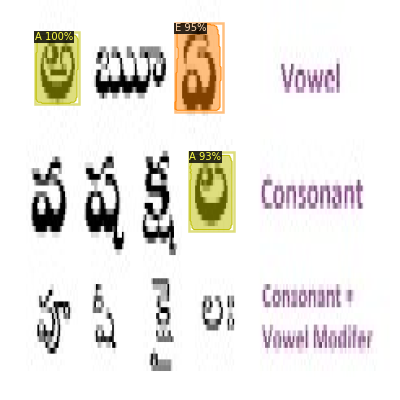

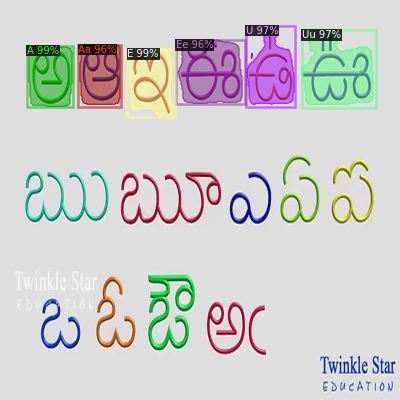

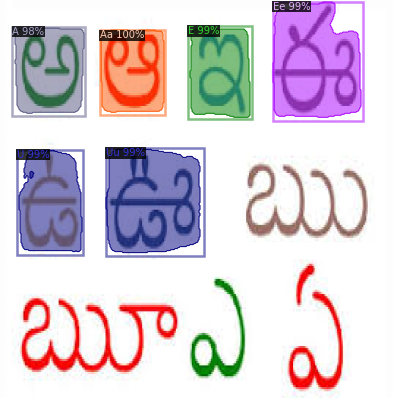

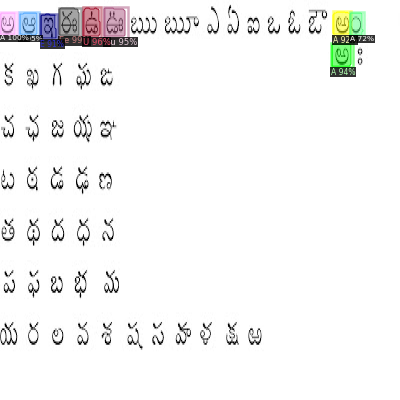

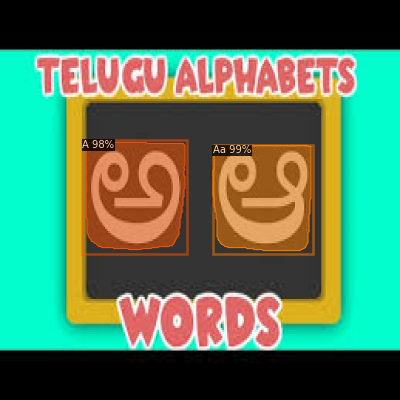

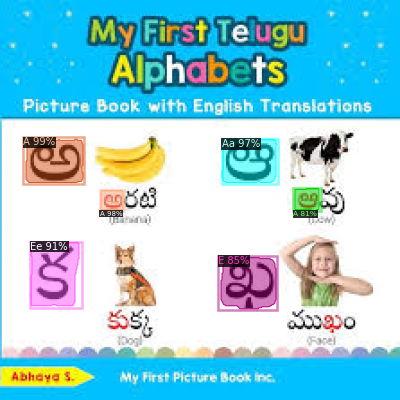

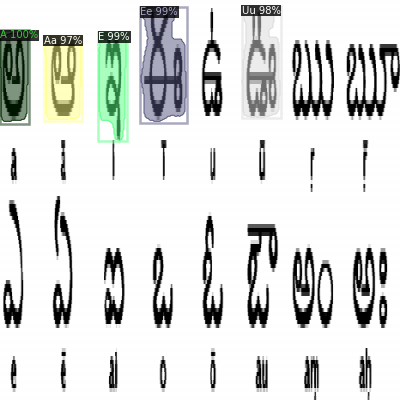

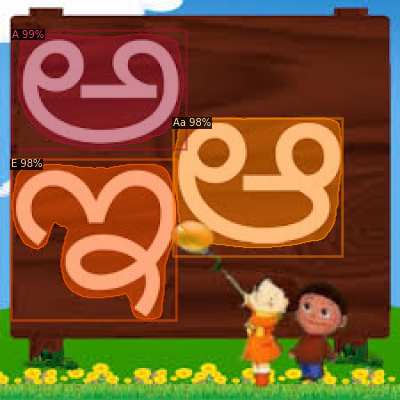

In [ ]:
for d in random.sample(test_dataset_dicts, 8):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=test_meta, 
                   scale=1, 
                  #  instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

Saving test_5.png to test_5 (3).png
User uploaded file "test_5.png" with length 13239 bytes


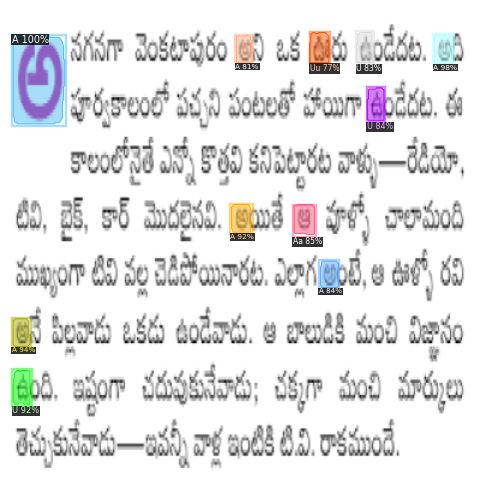

In [ ]:
import matplotlib.pyplot as plt
def predict_img(names):
  for file in names:
    im = cv2.imread(file)
    r_img = cv2.resize(im, (400, 400), interpolation = cv2.INTER_AREA)
    # cv2_imshow(r_img)
    outputs = predictor(r_img)
    v = Visualizer(r_img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])
    print('===='*20)



from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
predict_img(uploaded)



---



---

